In [1]:
import ee
import geemap
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
try:
  ee.Initialize()
except:
  ee.Authenticate()
  ee.Initialize()

In [3]:
Map = geemap.Map()
Map

Map(center=[40, -100], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(T…

In [8]:
#draw a rectangle in the above map and then run this
feature = Map.draw_last_feature
roi = feature.geometry()
roi.getInfo()

{'geodesic': False,
 'type': 'Polygon',
 'coordinates': [[[72.819371, 19.062536],
   [72.819371, 19.107853],
   [72.892212, 19.107853],
   [72.892212, 19.062536],
   [72.819371, 19.062536]]]}

In [9]:
imageCollection = ee.ImageCollection('LANDSAT/LC08/C01/T1_TOA') \
        .filterDate('2020-01-01', '2020-04-01') \
        .filterBounds(roi) \
        .filterMetadata('CLOUD_COVER', 'less_than', 5)\
        .select(['B4', 'B3', 'B2'])
        


count = imageCollection.size().getInfo()
print("Total satellite images available across the date range:",count)
imgChn = ee.Image(imageCollection.toList(imageCollection.size()).get(0))
rgb_img = geemap.ee_to_numpy(imgChn, region=roi)
print(rgb_img.shape)
rgbImg = ((rgb_img - rgb_img.min()) * (1/(rgb_img.max() - rgb_img.min()) * 255)).astype('uint8')

rgbImg.min(),rgbImg.max()

Total satellite images available across the date range: 3
(171, 258, 3)


(0, 254)

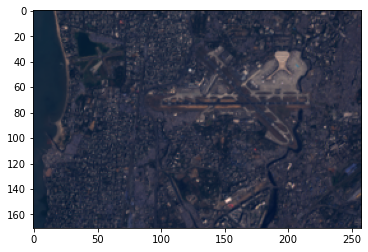

In [10]:
plt.imshow(rgbImg)
plt.show()